# 데이터

In [5]:
!conda install -q tfds-nightly

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - tfds-nightly

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

2023-01-02 16:53:11.382050: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 데이터 준비 ; 텐서플로우

In [9]:
ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/344 [00:00<?, ? examples/s]

Shuffling /Users/eunbilee/tensorflow_datasets/penguins/simple/1.0.0.incomplete781TGI/penguins-train.tfrecord*.…

Dataset penguins downloaded and prepared to /Users/eunbilee/tensorflow_datasets/penguins/simple/1.0.0. Subsequent calls will reuse this data.


2023-01-02 16:57:12.887353: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### 데이터 확인

In [10]:
print(df)
print(info.features)

   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': float32,
    'culmen_depth_mm': float32,
    'culmen_length_mm': float32,
    'flipper_length_mm': float32,
    'island': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


### 펭귄 종 확인

In [14]:
class_names = ['Adelie', 'Chinstrap', 'Gentoo']

### 전처리 데이터셋 분리

In [16]:
ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)

ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)


### 데이터 프레임 ; 분리 확인
- test
- train 으로 분리
- one-hot encoding 확인 가능

In [17]:
print(info.features)
df_test = tfds.as_dataframe(ds_test.take(3), info)
print("Test dataset sample: ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(3), info)
print("Train datasets sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})
Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
Train datasets sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1


2023-01-02 17:11:17.652052: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-01-02 17:11:17.731542: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### 정규화된 특성, 종 레이블로 데이터 축소

```next(iter())```

In [26]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

2023-01-02 17:25:33.015721: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## 클러스터로 시각화

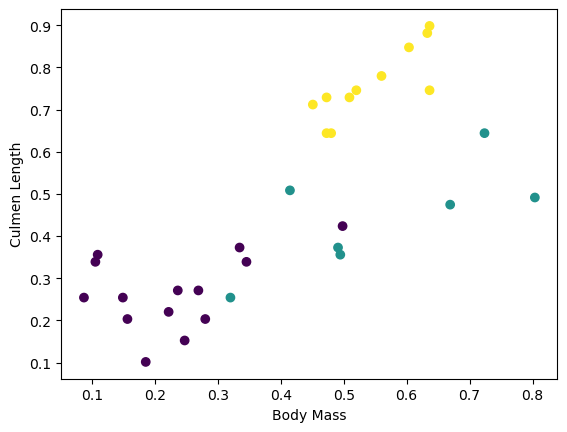

In [20]:
plt.scatter(features[:, 0], features[:, 2], c=labels, cmap='viridis')

plt.xlabel("Body Mass") # 체중
plt.ylabel("Culmen Length") # 부리 길이
plt.show()

# 모델

In [21]:
# 선형 모델

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [27]:
# 모델 사용

predictions = model(features)
tf.nn.softmax(predictions[:5])

print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


In [28]:
# 모델 훈련 - 손실함수와 경사함수 정의

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y, training):
    y_ = model(x, training=training)
    
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.0798901319503784


In [29]:
# 모델 최적화
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [30]:
# 옵티마이저 생성
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [32]:
# 단일 최적화
loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {}, Loss: {}".format(optimizer.iterations.numpy(), loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.0798901319503784
Step: 1, Loss: 1.0783190727233887


In [35]:
# 모델 훈련

train_loss_results = []
train_accuracy_results = []

num_epochs = 200

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()


    # Training loop - using batches of 32
    for x, y in ds_train_batch:
    # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))


    # Track progress
    epoch_loss_avg.update_state(loss_value) # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))


    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 1.129, Accuracy: 18.182%
Epoch 050: Loss: 0.821, Accuracy: 63.636%
Epoch 100: Loss: 0.606, Accuracy: 63.636%
Epoch 150: Loss: 0.436, Accuracy: 72.727%


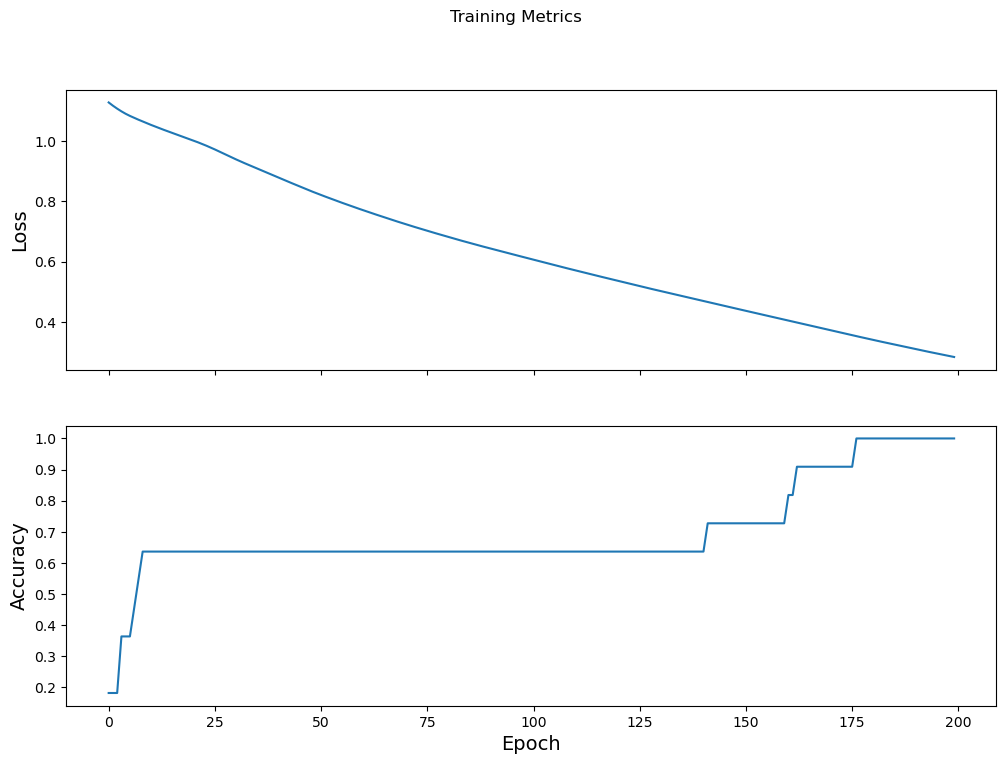

In [36]:
# 손실함수 시각화
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [37]:
# 모델 평가
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(1)

for (x, y) in ds_test_batch:
    logits = model(x, training=False)
    prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
    test_accuracy(prediction, y)
    
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 94.030%


In [42]:
# 훈련된 모델로 예측

predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
    class_idx = tf.math.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Adelie (82.7%)
Example 1 prediction: Gentoo (97.1%)
Example 2 prediction: Chinstrap (63.2%)


----

# 데이터

## 준비

In [47]:
import pandas as pd

penguins = pd.read_csv('../datasets/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 펭귄 종류 확인

In [48]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

## 데이터 정보 확인

In [49]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 결측치 확인

In [50]:
penguins.isna().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### 결측치 확인

In [51]:
penguins = penguins.dropna()
penguins.isna().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## 속성과 레이블 분리

In [53]:
X = penguins.drop(['species'], axis=1)
y = penguins["species"]

## 테스트 데이터 분리

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(266, 6) (266,)
(67, 6) (67,)


## 학습에 사용할 컬럼 추출

In [57]:
df = X_train[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
230,40.9,13.7,214.0,4650.0
84,37.3,17.8,191.0,3350.0
303,50.0,15.9,224.0,5350.0
22,35.9,19.2,189.0,3800.0
29,40.5,18.9,180.0,3950.0


## 스케일링

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_s = scaler.fit_transform(df)
df_s

array([[0.32      , 0.07142857, 0.71186441, 0.54166667],
       [0.18909091, 0.55952381, 0.3220339 , 0.18055556],
       [0.65090909, 0.33333333, 0.88135593, 0.73611111],
       ...,
       [0.27636364, 0.54761905, 0.3559322 , 0.13888889],
       [0.48727273, 0.22619048, 0.81355932, 0.63888889],
       [0.21818182, 0.46428571, 0.15254237, 0.13194444]])

## 데이터 프레임 생성

In [60]:
dfX = pd.DataFrame(df_s,
                   columns=['bill_length_mm','bill_depth_mm',
                            'flipper_length_mm', 'body_mass_g'])
dfX.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.320000,0.071429,0.711864,0.541667
1,0.189091,0.559524,0.322034,0.180556
2,0.650909,0.333333,0.881356,0.736111
3,0.138182,0.726190,0.288136,0.305556
4,0.305455,0.690476,0.135593,0.347222


## 레이블 인코딩

### 섬이름 문자열 <-> 숫자 데이터 변경

In [61]:
dfX['island']= X_train['island'].map(
   {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}).reset_index(drop = True)
dfX.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island
0,0.320000,0.071429,0.711864,0.541667,0
1,0.189091,0.559524,0.322034,0.180556,1
2,0.650909,0.333333,0.881356,0.736111,0
3,0.138182,0.726190,0.288136,0.305556,0
4,0.305455,0.690476,0.135593,0.347222,0


### 성별 문자열 인코딩

In [62]:
dfX['sex'] = X_train['sex'].map(
   {'FEMALE': 0, 'MALE': 1}).reset_index(drop = True)
dfX.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex
0,0.320000,0.071429,0.711864,0.541667,0,0
1,0.189091,0.559524,0.322034,0.180556,1,0
2,0.650909,0.333333,0.881356,0.736111,0,1
3,0.138182,0.726190,0.288136,0.305556,0,0
4,0.305455,0.690476,0.135593,0.347222,0,1
5,0.447273,0.500000,0.796610,0.708333,0,1
6,0.512727,0.119048,0.762712,0.465278,0,0
7,0.392727,0.000000,0.728814,0.638889,0,0
8,0.803636,0.916667,0.491525,0.444444,1,1
9,0.225455,0.726190,0.288136,0.347222,1,1


### 펭귄 종류 문자열 <-> 숫자 인코딩

In [63]:
dfy = y_train.map(
   {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}).reset_index(drop = True)
dfy

0      2
1      0
2      2
3      0
4      0
      ..
261    1
262    0
263    0
264    2
265    0
Name: species, Length: 266, dtype: int64

### 원-핫 인코딩 (타겟 데이터)

In [71]:
# from tensorflow.keras import utils

# y_train = utils.to_categorical(y_train)
# y_train[:20]

y_train = y_train.map(
   {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}).reset_index(drop = True)
y_train[:20]

0     2
1     0
2     2
3     0
4     0
5     2
6     2
7     2
8     1
9     0
10    0
11    0
12    2
13    0
14    0
15    1
16    0
17    2
18    2
19    0
Name: species, dtype: int64

In [78]:
y_train = y_train.values

# 모델

In [66]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
layers.Dense(32, activation='relu', input_shape=(6,)), layers.Dense(16, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(3, activation='softmax') ## 다중 분류
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 3)                 27        
                                                                 
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________


## 컴파일

In [74]:
model.compile(loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])

## 학습

In [79]:
EPOCHS = 50
BATCH_SIZE = 32
history = model.fit(X_train, y_train,
           epochs=EPOCHS,
           batch_size=BATCH_SIZE,
           validation_split=0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

### 학습 곡선

In [76]:
plot_history(history)

NameError: name 'plot_history' is not defined

## 테스트 데이터 처리하기

In [67]:
df = X_test[['bill_length_mm','bill_depth_mm',
        'flipper_length_mm', 'body_mass_g']]
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
30,39.5,16.7,178.0,3250.0
317,46.9,14.6,222.0,4875.0
79,42.1,19.1,195.0,4000.0
201,49.8,17.3,198.0,3675.0
63,41.1,18.2,192.0,4050.0


### 스케일링

In [68]:
df_s = scaler.transform(df)
df_s[:10]

array([[0.26909091, 0.42857143, 0.10169492, 0.15277778],
       [0.53818182, 0.17857143, 0.84745763, 0.60416667],
       [0.36363636, 0.71428571, 0.38983051, 0.36111111],
       [0.64363636, 0.5       , 0.44067797, 0.27083333],
       [0.32727273, 0.60714286, 0.33898305, 0.375     ],
       [0.46545455, 0.08333333, 0.6779661 , 0.56944444],
       [0.67636364, 0.22619048, 0.86440678, 0.79166667],
       [0.64      , 0.6547619 , 0.38983051, 0.25      ],
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111],
       [0.70181818, 0.70238095, 0.49152542, 0.34722222]])

### 데이터 프레임 생성

In [69]:
dfX = pd.DataFrame(df_s, columns=['bill_length_mm','bill_depth_mm',
                                  'flipper_length_mm', 'body_mass_g'])
dfX.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.269091,0.428571,0.101695,0.152778
1,0.538182,0.178571,0.847458,0.604167
2,0.363636,0.714286,0.389831,0.361111
3,0.643636,0.500000,0.440678,0.270833
4,0.327273,0.607143,0.338983,0.375000


### 데이터 인코딩

In [70]:
dfX['island']= X_test['island'].map(
   {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}).reset_index(drop = True)
dfX['sex'] = X_test['sex'].map(
             {'FEMALE': 0, 'MALE': 1}).reset_index(drop = True)
dfX.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex
0,0.269091,0.428571,0.101695,0.152778,1,0
1,0.538182,0.178571,0.847458,0.604167,0,0
2,0.363636,0.714286,0.389831,0.361111,2,1
3,0.643636,0.500000,0.440678,0.270833,1,0
4,0.327273,0.607143,0.338983,0.375000,0,1
5,0.465455,0.083333,0.677966,0.569444,0,0
6,0.676364,0.226190,0.864407,0.791667,0,1
7,0.640000,0.654762,0.389831,0.250000,1,1
8,0.636364,0.607143,0.355932,0.298611,1,1
9,0.701818,0.702381,0.491525,0.347222,1,1


### 타겟 데이터 인코딩

In [77]:
dfy = y_test.map(
   {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}).reset_index(drop = True)
dfy

0     0
1     2
2     0
3     1
4     0
     ..
62    2
63    0
64    0
65    2
66    0
Name: species, Length: 67, dtype: int64

### 넘파이 배열로 타입 변경

In [80]:
X_test = dfX.values
y_test = dfy.values

X_test = X_test.astype('float32')

## 예측

In [81]:
y_pred = model.predict(X_test)
y_pred[:5]

3/3 [==============================] - 0s 2ms/step


array([[0.4290053 , 0.28921545, 0.28177926],
       [0.373383  , 0.325276  , 0.30134103],
       [0.54225004, 0.24130292, 0.21644706],
       [0.44846725, 0.2868552 , 0.26467758],
       [0.41743156, 0.30183932, 0.2807291 ]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

## 혼동행렬 계산

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

### 시각화

In [ ]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

## 평가지표 계산

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

def print_scores(y_true, y_pred):
    print('accuracy_score: {0:.4f}'.format(
     accuracy_score(y_true, y_pred)))
    print('precision_score: {0:.4f}'.format(
     precision_score(y_true, y_pred, average='macro')))
    print('recall_score: {0:.4f}'.format(
     recall_score(y_true, y_pred, average='macro')))
    
print_scores(y_test, y_pred)